# Classification
- logistic regression classifier

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Logistic Regression classifier
- go to https://www.kaggle.com/uciml/breast-cancer-wisconsin-data and download data.csv file and save it as breast_cancer.csv

In [24]:
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('./data/breast_cancer.csv')
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
df.shape

(569, 32)

In [5]:
# df = df.drop("Unnamed: 32", axis=1)
df.shape

(569, 32)

In [26]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0}) # malignant, benign

In [27]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [28]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [45]:
X, y = df["radius_mean"].values, df["diagnosis"]   # single feature

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size = 0.3)

model=LogisticRegression()
model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 86.55%


In [46]:
print(model.coef_, model.intercept_)

[[0.99473262]] [-14.89413761]


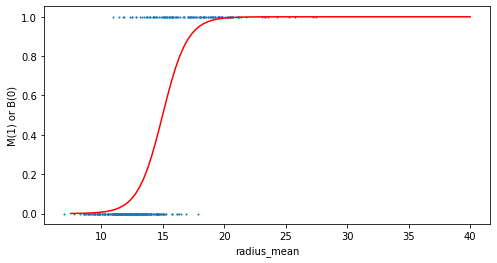

In [47]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("radius_mean")
plt.ylabel("M(1) or B(0)")

def logistic(x):
    return 1 / (1 + np.exp(-x))

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logistic(model.coef_[0,0] * XX + model.intercept_), c='r')

Score: 69.59%


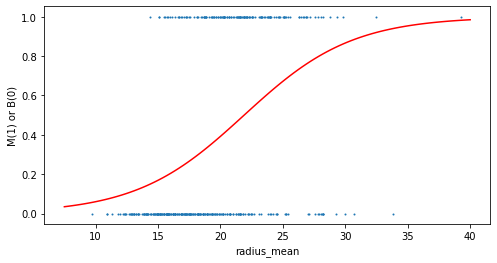

In [48]:
X, y = df["texture_mean"].values, df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size = 0.3)

model=LogisticRegression()
model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("radius_mean")
plt.ylabel("M(1) or B(0)")

def logistic(x):
    return 1 / (1 + np.exp(-x))

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logistic(model.coef_[0,0] * XX + model.intercept_), c='r')

In [49]:
df.corr().sort_values(by='diagnosis', ascending=False)[:5]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
concave points_worst,0.035174,0.793566,0.744214,0.295316,0.771241,0.722017,0.503053,0.815573,0.861323,0.910155,...,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114
perimeter_worst,0.079986,0.782914,0.965137,0.358040,0.970387,0.959120,0.238853,0.590210,0.729565,0.855923,...,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
radius_worst,0.082405,0.776454,0.969539,0.352573,0.969476,0.962746,0.213120,0.535315,0.688236,0.830318,...,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492


- let's use all features

In [50]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [51]:
X, y = df.drop(['id','diagnosis'], axis=1), df['diagnosis']

In [52]:
df.shape, X.shape, y.shape

((569, 32), (569, 30), (569,))

In [66]:
# np.random.seed(17)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model_all = LogisticRegression()
model_all.fit(X_train, y_train)
print("Score: {0:.2%}".format(model_all.score(X_test, y_test)))
model_all.score(X_test, y_test)
model_all.predict(X_test)

Score: 93.57%


C:\Users\rtaje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [67]:
model_all.predict_proba(X_test).round(3)

array([[0.   , 1.   ],
       [0.988, 0.012],
       [0.999, 0.001],
       [0.   , 1.   ],
       [0.009, 0.991],
       [0.964, 0.036],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.999, 0.001],
       [1.   , 0.   ],
       [0.994, 0.006],
       [0.888, 0.112],
       [0.   , 1.   ],
       [0.996, 0.004],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.817, 0.183],
       [0.002, 0.998],
       [0.983, 0.017],
       [0.999, 0.001],
       [0.069, 0.931],
       [0.973, 0.027],
       [0.988, 0.012],
       [0.998, 0.002],
       [0.349, 0.651],
       [0.894, 0.106],
       [0.999, 0.001],
       [0.999, 0.001],
       [0.997, 0.003],
       [1.   , 0.   ],
       [0.994, 0.006],
       [0.128, 0.872],
       [0.   , 1.   ],
       [0.974, 0.026],
       [0.   , 1.   ],
       [0.999, 0.001],
       [1.   , 0.   ],
       [0.99 , 0.01 ],
       [0.985, 0.015],
       [0.98 , 0.02 ],
       [0.999, 0.001],
       [0.975, 0.025],
       [0.9

In [68]:
from sklearn.neighbors import KNeighborsClassifier  
for i in range(1,21,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("K = ", i, "-> Score: {0:.2%}".format(knn.score(X_test, y_test)))

K =  1 -> Score: 90.06%
K =  3 -> Score: 88.89%
K =  5 -> Score: 89.47%
K =  7 -> Score: 89.47%
K =  9 -> Score: 91.81%
K =  11 -> Score: 91.81%
K =  13 -> Score: 91.23%
K =  15 -> Score: 91.81%
K =  17 -> Score: 91.81%
K =  19 -> Score: 91.23%


In [69]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("결정트리 -> {:.2%}".format(tree.score(X_test, y_test)))

결정트리 -> 92.98%


In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)    # no. of trees
rfc.fit(X_train, y_train)
print("랜덤포레스트 : {:.2%}".format(rfc.score(X_test, y_test)))

랜덤포레스트 : 94.74%
